# ***IMPORT LIBRARY***

In [ ]:
import pandas as pd
import math
import numpy as np
import gdown

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

from sklearn.metrics import mean_absolute_error, mean_squared_error

from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# ***DATASET***

## ***Dataset* Film**

In [ ]:
'''https://drive.google.com/file/d/17kQ4-VbHL0Dsn1E9z_OTxgtile3yPIrl/view?usp=sharing'''

id = "17kQ4-VbHL0Dsn1E9z_OTxgtile3yPIrl"
gdown.download(id=id, output="imdb.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=17kQ4-VbHL0Dsn1E9z_OTxgtile3yPIrl
To: /content/imdb.csv
100%|██████████| 1.54M/1.54M [00:00<00:00, 14.1MB/s]


'imdb.csv'

In [ ]:
df_film = pd.read_csv("imdb.csv")
df_film.drop(columns=['Unnamed: 0'], errors='ignore', inplace=True)
df_film

,type,name,url,poster,description,review,IMDB,contentRating,genre,datePublished,keywords,duration,actor,director,creator,RottenTomatoes Audience Score,RottenTomatoes Tomato Meter
0,Movie,14 Cameras,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMTk4OD...,When a family of five rent a beautiful house f...,"{'author': 'aprilsfriendorin', 'dateCreated': ...",2.30,TV-MA,"['Crime', 'Horror', 'Thriller']",2018-07-27,"tied feet,tied up while barefoot,tape over mou...",PT1H30M,"[{'name': 'Zach Dulin', 'url': 'https://www.im...","[{'name': 'Seth Fuller', 'url': 'https://www.i...","[{'name': 'Victor Zarcoff', 'url': 'https://ww...",1.10,1.10
1,Movie,17 Again,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMjA2NT...,0,"{'author': 'tavm', 'dateCreated': '2009-04-21'...",3.20,PG-13,"['Comedy', 'Drama', 'Fantasy']",2009-04-17,"body transformation,adult as child,high school...",PT1H42M,"[{'name': 'Zac Efron', 'url': 'https://www.imd...","[{'name': 'Burr Steers', 'url': 'https://www.i...","[{'name': 'Jason Filardi', 'url': 'https://www...",3.35,2.80
2,Movie,1BR,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BNDgxY2...,0,"{'author': 'aarpcats', 'dateCreated': '2022-01...",2.90,TV-MA,"['Drama', 'Horror', 'Thriller']",2020-04-24,"community,apartment building,submission,stockh...",PT1H30M,"[{'name': 'Nicole Brydon Bloom', 'url': 'https...","[{'name': 'David Marmor', 'url': 'https://www....","[{'name': 'David Marmor', 'url': 'https://www....",2.65,4.40
3,Movie,3 Days to Kill,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BYjE2Nm...,A dying CIA agent trying to reconnect with his...,"{'author': 'slightlymad22', 'dateCreated': '20...",3.10,PG-13,"['Action', 'Comedy', 'Drama']",2014-02-25,"spy,violence,dirty bomb,massacre,cough syrup",PT1H57M,"[{'name': 'Kevin Costner', 'url': 'https://www...","[{'name': 'McG', 'url': 'https://www.imdb.com/...","[{'name': 'Adi Hasak', 'url': 'https://www.imd...",2.15,1.40
4,Movie,3 Idiots,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BNTkyOG...,0,"{'author': 'lanacastillo49', 'dateCreated': '2...",4.20,13+,"['Comedy', 'Drama']",2009-12-25,"hairy chest,motivation,coming of age,against t...",PT2H50M,"[{'name': 'Aamir Khan', 'url': 'https://www.im...","[{'name': 'Rajkumar Hirani', 'url': 'https://w...","[{'name': 'Abhijat Joshi', 'url': 'https://www...",4.65,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,Movie,Zombieland,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMjIzND...,0,"{'author': 'Fella_shibby', 'dateCreated': '201...",3.80,D,"['Action', 'Comedy', 'Horror']",2009-10-02,"zombie,amusement park,human versus zombie,zomb...",PT1H28M,"[{'name': 'Jesse Eisenberg', 'url': 'https://w...","[{'name': 'Ruben Fleischer', 'url': 'https://w...","[{'name': 'Rhett Reese', 'url': 'https://www.i...",4.30,4.45
850,Movie,iNumber Number: Jozi Gold,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BM2RhYz...,When an undercover cop is tasked with investig...,"{'author': 'penofinspiratin', 'dateCreated': '...",2.20,0,"['Action', 'Adventure', 'Crime']",2023-06-23,"police procedural crime,team action",PT1H53M,"[{'name': 'Lonwabo Bokamoso', 'url': 'https://...","[{'name': 'Donovan Marsh', 'url': 'https://www...","[{'name': 'Donovan Marsh', 'url': 'https://www...",0.00,0.00
851,Movie,¡Que viva México!,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMDFiMD...,0,"{'author': 'cobo-3', 'dateCreated': '2023-03-2...",2.75,R,['Comedy'],2023-03-23,"female full frontal nudity,female nudity,femal...",PT3H11M,"[{'name': 'Damián Alcázar', 'url': 'https://ww...","[{'name': 'Luis Estrada', 'url': 'https://www....","[{'name': 'Luis Estrada', 'url': 'https://www....",0.00,1.45
852,Movie,¿Enco

## ***Dataset Rating***


In [ ]:
'''https://drive.google.com/file/d/19R20uhlTJZp56nx5BlRgdH_j3bZpk5MZ/view?usp=sharing'''

id = "19R20uhlTJZp56nx5BlRgdH_j3bZpk5MZ"
gdown.download(id=id, output="roberta_sentiment_scores.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=19R20uhlTJZp56nx5BlRgdH_j3bZpk5MZ
To: /content/roberta_sentiment_scores.csv
100%|██████████| 5.74M/5.74M [00:00<00:00, 36.6MB/s]


'roberta_sentiment_scores.csv'

In [ ]:
df_rating = pd.read_csv("roberta_sentiment_scores.csv")
df_rating

,title,username,Text,Sentiment,sentiment_score
0,Cargo,moviemenfes,this mvs is very sad nangiiis in this scene th...,Positive,4.993645
1,Layar,bicaraboxoffice,if for example there is one film that aired on...,Neutral,1.009726
2,What If,moviemenfes,mvs what if today? how come it s not in disney...,Neutral,1.010560
3,Layar,WatchmenID,for those who miss seeing arini on the big screen,Neutral,1.386715
4,Lightyear,ErikDavis,new trailer chris evans stars as buzz in a new...,Neutral,4.128984
...,...,...,...,...,...
34063,Rise,zavvi,the droids hold a special place in my heart an...,Positive,4.993868
34064,Rise,zavvi,okay campers rise and shine! this sunday at 7p...,Positive,4.984983
34065,Rise,zavvi,star wars episode ix the rise of skywalker zav...,Positive,4.956692
34066,Seasons,zavvi,season 1 6 blu ray boxset only 69 99 in our !,Negative,1.008112


In [ ]:
df_rating.describe()

,sentiment_score
count,34068.000000
mean,3.112461
std,1.967766
min,1.007205
25%,1.009236
50%,4.958761
75%,4.989870
max,4.995188


# ***PRE-PROCESSING DATASET RATING***

## ***Detect Outliers***

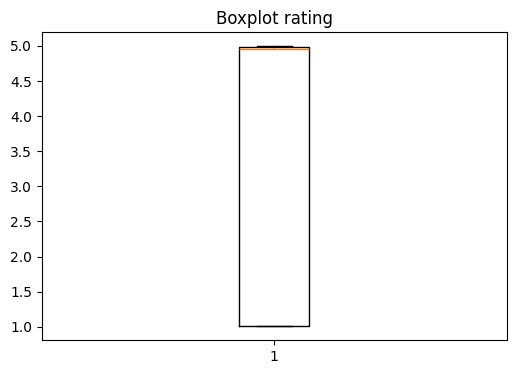

Outlier values:
Series([], Name: sentiment_score, dtype: float64)


In [ ]:
# mengecek outlier menggunakan z-score
plt.figure(figsize=(6, 4))
plt.boxplot(df_rating["sentiment_score"])
plt.title(f'Boxplot {"rating"}')
plt.show()

z_scores = stats.zscore(df_rating["sentiment_score"])
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)
outlier_values = df_rating["sentiment_score"][outliers]

print("Outlier values:")
print(outlier_values)

## ***Set Columns***

In [ ]:
df_rating = df_rating.rename(columns={'username': 'nama_akun'})
df_rating = df_rating.rename(columns={'title': 'judul_film'})
df_rating = df_rating.rename(columns={'sentiment_score': 'rating'})

## ***Missing Value***

In [ ]:
print(df_rating.isnull().sum())

judul_film    0
nama_akun     0
Text          0
Sentiment     0
rating        0
dtype: int64


In [ ]:
df_rating

,judul_film,nama_akun,Text,Sentiment,rating
0,Cargo,moviemenfes,this mvs is very sad nangiiis in this scene th...,Positive,4.993645
1,Layar,bicaraboxoffice,if for example there is one film that aired on...,Neutral,1.009726
2,What If,moviemenfes,mvs what if today? how come it s not in disney...,Neutral,1.010560
3,Layar,WatchmenID,for those who miss seeing arini on the big screen,Neutral,1.386715
4,Lightyear,ErikDavis,new trailer chris evans stars as buzz in a new...,Neutral,4.128984
...,...,...,...,...,...
34063,Rise,zavvi,the droids hold a special place in my heart an...,Positive,4.993868
34064,Rise,zavvi,okay campers rise and shine! this sunday at 7p...,Positive,4.984983
34065,Rise,zavvi,star wars episode ix the rise of skywalker zav...,Positive,4.956692
34066,Seasons,zavvi,season 1 6 blu ray boxset only 69 99 in our !,Negative,1.008112


# ***TEMPLATE DATASET***

## ***Dataset* Kosong**

Berisi kolom yang akan diisi untuk hasil prediksi *rating* sistem rekomendasi.

In [ ]:
columns = []
columns.append('nama film')
accounts = df_rating.nama_akun.unique()
for account_index in range (0, len(accounts)):
  columns.append(accounts[account_index])

data_entries = []
films = df_film.name
for film_index in range (0, len(films)):
  data_entries.append({'nama film' : films[film_index]})

In [ ]:
df = pd.DataFrame(columns=columns)
df = pd.concat([df, pd.DataFrame(data_entries)], ignore_index=True)
df.fillna(0, inplace=True)

## ***Merging Dataset***

Penggabungan kolom pada *dataset* dengan cara mengambil data nama akun dan judul film sebagai kolom, serta *rating* sebagai *value*.

In [ ]:
for rating_index in range(len(df_rating)):
    df[df_rating["nama_akun"][rating_index]].loc[df["nama film"] == df_rating["judul_film"][rating_index]] = round(df_rating["rating"][rating_index],2)

df

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,14 Cameras,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
1,17 Again,1.01,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,1.01,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
2,1BR,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.00,4.99,0.0,0.0,0.0,0.0
3,3 Days to Kill,0.00,0.0,0.00,0.0,1.01,1.01,4.99,0.00,0.0,...,0.00,1.01,0.0,0.0,1.01,0.00,0.0,0.0,0.0,0.0
4,3 Idiots,1.01,0.0,1.01,0.0,0.00,0.00,1.01,4.99,0.0,...,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,Zombieland,1.01,0.0,4.99,0.0,1.01,4.98,4.99,4.99,0.0,...,1.01,4.99,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
850,iNumber Number: Jozi Gold,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
851,¡Que viva México!,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
852,¿Encontró lo que buscaba?,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0


# ***DATASET* SIAP OLAH**

## ***Sparsity Data***

Sparse data merujuk pada situasi di mana sebagian besar nilai dalam suatu dataset adalah nol

In [ ]:
jumlah_nilai_nol = (df.iloc[:, 1:] == 0).sum().sum()
jumlah_total = df.iloc[:, 1:].size
persentase_sparsity = (jumlah_nilai_nol / jumlah_total) * 100

print(f"Jumlah nilai 0 dalam dataset: {jumlah_nilai_nol}")
print(f"Persentase sparsity: {persentase_sparsity:.2f}%")

Jumlah nilai 0 dalam dataset: 29677
Persentase sparsity: 89.10%


In [ ]:
def cek_nilai_nol(row):
    return len([value for value in row if value != 0])

df['Nilai Nol'] = df.apply(cek_nilai_nol, axis=1)
df_film['Nilai Nol'] = df['Nilai Nol']

df = df[df['Nilai Nol'] > 5]
df_film = df_film[df_film['Nilai Nol'] > 5]

df = df.drop('Nilai Nol', axis=1)
df = df.reset_index(drop=True)

df_film = df_film.drop('Nilai Nol', axis=1)
df_film = df_film.reset_index(drop=True)

df

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.00,0.00,0.00,0.00,1.01,1.01,4.99,0.00,0.00,...,0.00,1.01,0.00,0.00,1.01,0.00,0.00,0.00,0.00,0.00
1,3 Idiots,1.01,0.00,1.01,0.00,0.00,0.00,1.01,4.99,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,5 Cowok Jagoan,0.00,1.01,0.00,0.00,0.00,4.99,4.99,1.01,0.00,...,0.00,0.00,0.00,0.00,0.00,4.99,0.00,0.00,0.00,0.00
3,6 Underground,4.99,3.00,0.00,0.00,4.98,4.99,0.00,1.01,0.00,...,0.00,1.01,0.00,0.00,0.00,4.99,0.00,0.00,0.00,0.00
4,65,1.01,1.01,4.99,1.01,1.01,4.99,4.99,1.01,4.98,...,4.99,4.99,4.99,4.97,4.96,1.01,1.01,0.00,1.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,You People,1.01,0.00,0.00,1.01,0.00,0.00,0.00,0.00,4.99,...,0.00,0.00,0.00,1.01,0.00,0.00,1.01,0.00,0.00,1.01
278,Young Adult,0.00,0.00,0.00,0.00,0.00,4.99,4.97,4.99,0.00,...,0.00,4.99,0.00,0.00,4.76,0.00,0.00,0.00,0.00,0.00
279,Your Place or Mine,1.02,0.00,0.00,4.99,0.00,0.00,0.00,0.00,4.99,...,0.00,0.00,0.00,0.00,0.00,1.01,1.01,0.00,0.00,0.00
280,Zodiac,4.99,0.00,1.01,0.00,0.00,1.02,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.01,0.00,0.00


In [ ]:
# cek setelah di drop beberapa film
jumlah_nilai_nol = (df.iloc[:, 1:] == 0).sum().sum()
jumlah_total = df.iloc[:, 1:].size
persentase_sparsity = (jumlah_nilai_nol / jumlah_total) * 100

print(f"Jumlah nilai 0 dalam dataset: {jumlah_nilai_nol}")
print(f"Persentase sparsity: {persentase_sparsity:.2f}%")

Jumlah nilai 0 dalam dataset: 7873
Persentase sparsity: 71.59%


## ***Data Normalization***

Menggunakan ***Min-Max Scaler*** untuk mengubah nilai-nilai dalam suatu fitur (*variabel*) sehingga rentang nilainya antara 0 hingga 1. Guna menghindari bias yang dapat timbul jika beberapa fitur memiliki skala yang jauh berbeda dalam data.

In [ ]:
df_normalized = df.copy()

scaler = MinMaxScaler()
columns = df.columns[1:]
df_normalized[columns] = scaler.fit_transform(df_normalized[columns])

df_normalized

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.000000,0.000000,0.000000,0.000000,0.202405,0.202405,1.000000,0.000000,0.000000,...,0.000000,0.202405,0.0,0.000000,0.202405,0.000000,0.000000,0.000000,0.000000,0.0
1,3 Idiots,0.202405,0.000000,0.202405,0.000000,0.000000,0.000000,0.202405,1.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,5 Cowok Jagoan,0.000000,0.202405,0.000000,0.000000,0.000000,1.000000,1.000000,0.202405,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
3,6 Underground,1.000000,0.601202,0.000000,0.000000,0.997996,1.000000,0.000000,0.202405,0.000000,...,0.000000,0.202405,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
4,65,0.202405,0.202405,1.000000,0.202405,0.202405,1.000000,1.000000,0.202405,0.997996,...,1.000000,1.000000,1.0,0.995992,0.993988,0.202405,0.202405,0.000000,0.202405,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,You People,0.202405,0.000000,0.000000,0.202405,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,0.202405,0.000000,0.000000,0.202405,0.000000,0.000000,1.0
278,Young Adult,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.995992,1.000000,0.000000,...,0.000000,1.000000,0.0,0.000000,0.953908,0.000000,0.000000,0.000000,0.000000,0.0
279,Your Place or Mine,0.204409,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.202405,0.202405,0.000000,0.000000,0.0
280,Zodiac,1.000000,0.000000,0.202405,0.000000,0.000000,0.204409,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.202405,0.000000,0.0


## ***Transposing Dataset***

In [ ]:
df_transposed = df_normalized.set_index('nama film').T
df_transposed

nama film,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
moviemenfes,0.000000,0.202405,0.000000,1.000000,0.202405,1.000000,1.000000,0.202405,1.000000,0.000000,...,0.202405,0.202405,0.202405,0.202405,1.000000,0.202405,0.000000,0.204409,1.000000,0.202405
bicaraboxoffice,0.000000,0.000000,0.202405,0.601202,0.202405,0.000000,0.000000,0.204409,0.000000,0.202405,...,0.202405,0.202405,0.202405,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WatchmenID,0.000000,0.202405,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.204409,0.000000,0.000000,0.000000,0.202405,1.000000
ErikDavis,0.000000,0.000000,0.000000,0.000000,0.202405,0.000000,0.000000,0.202405,0.000000,0.000000,...,0.000000,0.202405,0.000000,0.000000,0.000000,0.202405,0.000000,1.000000,0.000000,0.000000
arulfittron,0.202405,0.000000,0.000000,0.997996,0.202405,0.000000,0.202405,0.000000,0.000000,0.202405,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.202405
GilaFilmID,0.202405,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.202405,0.997996,1.000000,...,0.202405,0.202405,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.204409,0.997996
TarizSolis,1.000000,0.202405,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.202405,1.000000,...,0.997996,0.000000,1.000000,0.000000,0.000000,0.000000,0.995992,0.000000,0.000000,1.000000
djaycoholyc,0.000000,1.000000,0.202405,0.202405,0.202405,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.993988,1.000000,0.000000,0.202405,0.000000,1.000000,0.000000,0.000000,1.000000
akstanwyck,0.000000,0.000000,0.000000,0.000000,0.997996,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.202405,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
slashfilm,0.000000,0.000000,0.000000,0.000000,0.202405,0.000000,0.000000,0.202405,0.000000,0.000000,...,0.997996,0.983968,0.000000,0.000000,0.000000,1.000000,0.000000,0.202405,0.000000,0.000000


In [ ]:
# # dataset siap olah
# df_transposed.to_excel("Dataset_Siap_Olah.xlsx", index=True)

# **DISTRIBUSI DATA**

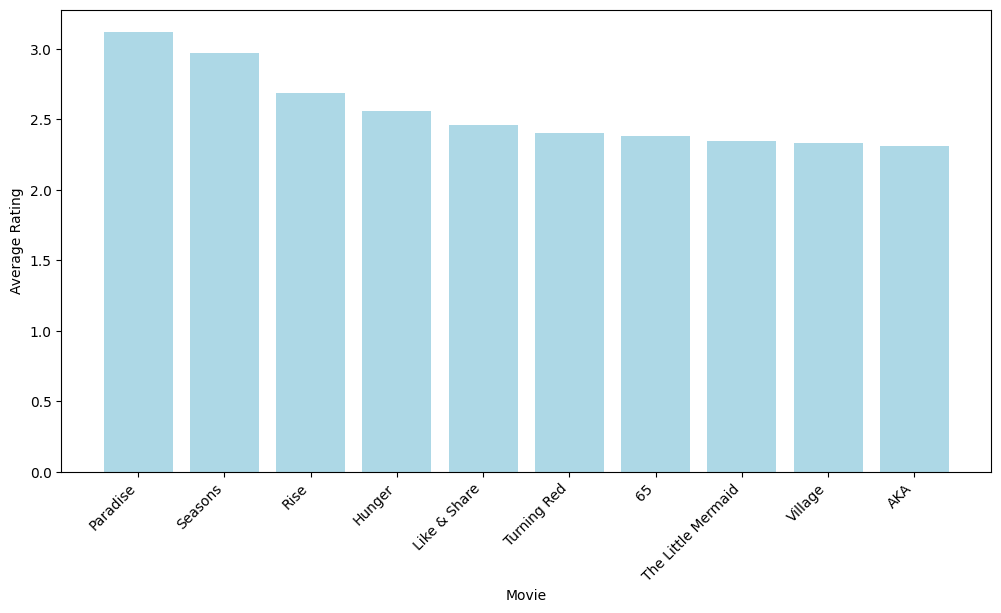

In [ ]:
data = df.copy()
# data = data.replace(0, np.NAN)

data["average"] = data.iloc[:, 1:].mean(axis=1)
data = data.sort_values("average", ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(data["nama film"][:10], data["average"][:10], color='lightblue')
plt.xlabel("Movie")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha="right")
plt.show()

# **Collaborative Filtering**

In [ ]:
df_cf = df_transposed.copy()
df_cf

nama film,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
moviemenfes,0.000000,0.202405,0.000000,1.000000,0.202405,1.000000,1.000000,0.202405,1.000000,0.000000,...,0.202405,0.202405,0.202405,0.202405,1.000000,0.202405,0.000000,0.204409,1.000000,0.202405
bicaraboxoffice,0.000000,0.000000,0.202405,0.601202,0.202405,0.000000,0.000000,0.204409,0.000000,0.202405,...,0.202405,0.202405,0.202405,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WatchmenID,0.000000,0.202405,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.204409,0.000000,0.000000,0.000000,0.202405,1.000000
ErikDavis,0.000000,0.000000,0.000000,0.000000,0.202405,0.000000,0.000000,0.202405,0.000000,0.000000,...,0.000000,0.202405,0.000000,0.000000,0.000000,0.202405,0.000000,1.000000,0.000000,0.000000
arulfittron,0.202405,0.000000,0.000000,0.997996,0.202405,0.000000,0.202405,0.000000,0.000000,0.202405,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.202405
GilaFilmID,0.202405,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.202405,0.997996,1.000000,...,0.202405,0.202405,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.204409,0.997996
TarizSolis,1.000000,0.202405,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.202405,1.000000,...,0.997996,0.000000,1.000000,0.000000,0.000000,0.000000,0.995992,0.000000,0.000000,1.000000
djaycoholyc,0.000000,1.000000,0.202405,0.202405,0.202405,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.993988,1.000000,0.000000,0.202405,0.000000,1.000000,0.000000,0.000000,1.000000
akstanwyck,0.000000,0.000000,0.000000,0.000000,0.997996,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.202405,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
slashfilm,0.000000,0.000000,0.000000,0.000000,0.202405,0.000000,0.000000,0.202405,0.000000,0.000000,...,0.997996,0.983968,0.000000,0.000000,0.000000,1.000000,0.000000,0.202405,0.000000,0.000000


## **Fungsi Mencari Rata-Rata dan Top N**

In [ ]:
# menghitung rata-rata
def average(df, film_name):
    """Calculates the average rating for a given film in a transposed DataFrame."""
    if film_name in df.columns:
        ratings = df[film_name]
        # Filter out non-zero ratings
        valid_ratings = ratings[ratings != 0]
        if not valid_ratings.empty:
            return round(valid_ratings.mean(), 2)
    return 0

In [ ]:
# mencari top n
def top_n(n, df, col):
    top_values = df[col].nlargest(n)
    return top_values

# ***Item-Based***

In [ ]:
item_based_df = df_transposed

for i in range(len(item_based_df)):
    # Corrected: Iterate over the columns of item_based_df (movie names)
    for movie_col in item_based_df.columns:
        if (item_based_df[movie_col][i] != 0):
            # Corrected: Pass item_based_df to the average function and access column names directly
            item_based_df.loc[item_based_df.index[i], movie_col] -= average(item_based_df, movie_col)
item_based_df

nama film,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
moviemenfes,0.000000,-0.227595,0.000000,0.250000,-0.357595,0.180000,0.530000,-0.547595,0.100000,0.000000,...,-0.467595,-0.357595,-0.557595,-0.447595,0.350000,-0.287595,0.000000,-0.515591,0.400000,-0.607595
bicaraboxoffice,0.000000,0.000000,-0.527595,-0.078798,-0.347595,0.000000,0.000000,-0.495591,0.000000,-0.497595,...,-0.427595,-0.337595,-0.477595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WatchmenID,0.000000,-0.167595,0.000000,0.000000,0.470000,0.000000,0.000000,0.340000,0.000000,0.000000,...,0.410000,0.490000,0.000000,0.000000,-0.365591,0.000000,0.000000,0.000000,-0.297595,0.240000
ErikDavis,0.000000,0.000000,0.000000,0.000000,-0.307595,0.000000,0.000000,-0.417595,0.000000,0.000000,...,0.000000,-0.287595,0.000000,0.000000,0.000000,-0.247595,0.000000,0.340000,0.000000,0.000000
arulfittron,-0.397595,0.000000,0.000000,0.377996,-0.297595,0.000000,-0.187595,0.000000,0.000000,-0.407595,...,0.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,0.000000,0.000000,-0.517595
GilaFilmID,-0.327595,0.000000,0.390000,0.440000,0.520000,0.000000,0.000000,-0.377595,0.207996,0.460000,...,-0.357595,-0.267595,0.380000,0.430000,0.000000,0.000000,0.080000,0.000000,-0.215591,0.317996
TarizSolis,0.540000,-0.117595,0.490000,0.000000,0.530000,0.000000,0.000000,0.460000,-0.487595,0.530000,...,0.467996,0.000000,0.450000,0.000000,0.000000,0.000000,0.175992,0.000000,0.000000,0.360000
djaycoholyc,0.000000,0.730000,-0.227595,-0.307595,-0.257595,0.290000,0.000000,0.490000,0.400000,0.590000,...,0.000000,0.543988,0.500000,0.000000,-0.247595,0.000000,0.260000,0.000000,0.000000,0.400000
akstanwyck,0.000000,0.000000,0.000000,0.000000,0.557996,0.000000,0.000000,0.520000,0.000000,0.000000,...,0.000000,-0.227595,0.000000,0.000000,0.000000,0.580000,0.000000,0.380000,0.000000,0.000000
slashfilm,0.000000,0.000000,0.000000,0.000000,-0.227595,0.000000,0.000000,-0.247595,0.000000,0.000000,...,0.497996,0.573968,0.000000,0.000000,0.000000,0.610000,0.000000,-0.367595,0.000000,0.000000


## ***Cosine Similarity***

In [ ]:
# mengambil kolom dengan nilai-nilai rating
rating_matrix1 = item_based_df.iloc[:, 1:]
sim_item = cosine_similarity(rating_matrix1.T)

sim_item_cs = pd.DataFrame(sim_item, index=item_based_df.iloc[:, 1:].columns, columns=item_based_df.iloc[:, 1:].columns)
sim_item_cs

nama film,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,AKA,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
nama film,,,,,,,,,,,,,,,,,,,,,
3 Idiots,1.000000,-0.152539,-0.179174,-0.079662,0.118075,-0.106232,0.142488,0.207615,0.209141,0.139559,...,-0.007586,0.148960,0.216096,0.051829,-0.118351,0.037752,0.100780,0.058715,-0.031247,0.351654
5 Cowok Jagoan,-0.152539,1.000000,0.421084,0.310355,-0.218263,0.000000,0.216881,0.119964,0.303435,0.204166,...,0.120460,-0.067009,0.158792,0.088489,0.318759,0.000000,0.033127,-0.027228,-0.059524,0.080823
6 Underground,-0.179174,0.421084,1.000000,-0.040196,0.095742,-0.036223,-0.054768,0.379126,0.133505,0.150753,...,-0.096365,0.009352,0.105159,-0.030687,0.370974,-0.065478,0.073000,-0.112451,0.219609,0.001453
65,-0.079662,0.310355,-0.040196,1.000000,0.185604,0.161166,0.268411,-0.102203,0.152416,0.362632,...,0.481526,0.209247,0.190041,0.360684,-0.011910,0.295371,0.435312,0.187977,-0.164526,0.329624
A Classic Horror Story,0.118075,-0.218263,0.095742,0.185604,1.000000,0.034792,0.074281,0.234937,0.251351,-0.003287,...,0.178832,0.197322,0.258301,0.376312,-0.093856,-0.066329,0.423026,-0.045326,0.056061,0.280215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You People,0.037752,0.000000,-0.065478,0.295371,-0.066329,-0.088478,0.070807,-0.044382,-0.037310,0.020669,...,0.223977,0.059915,0.016330,0.022385,-0.032215,1.000000,-0.032765,0.117984,-0.065127,0.020832
Young Adult,0.100780,0.033127,0.073000,0.435312,0.423026,0.265978,0.175445,0.104874,0.221413,0.285544,...,0.444746,0.355733,0.499195,0.382723,0.093384,-0.032765,1.000000,-0.088624,-0.180897,0.307534
Your Place or Mine,0.058715,-0.027228,-0.112451,0.187977,-0.045326,-0.161099,0.533032,0.269268,0.168781,0.161778,...,0.116863,0.160574,0.235691,0.212516,0.069122,0.117984,-0.088624,1.000000,0.073844,0.429665


### **Mencari *Top N***

Menampilkan Top Film berdasarkan nilai *similarity* hasil ***cosine similarity***

In [ ]:
def cek_topN(movie_title):
    print('Film yang mirip dengan "{}" adalah:\n'.format(movie_title))

    # mengurutkan film berdasarkan similarity
    similar_movies = sim_item_cs.sort_values(by=movie_title, ascending=False).index[1:11]

    for rank, similar_movie in enumerate(similar_movies, start=1):
        # nilai similarity
        similarity_score = sim_item_cs.loc[similar_movie, movie_title]
        print("No. {}: Film {} (Score: {:.4f})".format(rank, similar_movie, similarity_score))

In [ ]:
movies = "Merantau"
cek_topN(movies)

Film yang mirip dengan "Merantau" adalah:

No. 1: Film American Ultra (Score: 0.6266)
No. 2: Film Lincoln (Score: 0.6167)
No. 3: Film Paranormal Activity (Score: 0.5608)
No. 4: Film Sinister 2 (Score: 0.5493)
No. 5: Film The Doll (Score: 0.5369)
No. 6: Film The Smurfs (Score: 0.5214)
No. 7: Film Puisi Cinta yang Membunuh (Score: 0.4905)
No. 8: Film The Iron Lady (Score: 0.4904)
No. 9: Film I Care a Lot (Score: 0.4868)
No. 10: Film The Night Comes for Us (Score: 0.4865)


## ***FIND OPTIMAL $N$***

In [ ]:
sample_arr1 = np.empty([0])
rmse_item_cs = np.empty([0])
mae_item_cs = np.empty([0])

rating_df = df_transposed.copy()
original_df = df_transposed.copy()

# iterasi sampel n
for n in range(2, 51):
    sample = n

    # iterasi rows and columns
    for i in range(len(rating_df)):
        for j in range(len(sim_item_cs)):
            # Get the movie name from the columns of sim_item_cs
            movie_col_name = sim_item_cs.columns[j]

            if rating_df[movie_col_name][i] != 0:
                numerator = 0
                denominator = 0
                tmp = top_n(sample, sim_item_cs, movie_col_name)

                # iterasi top similar items
                for k in range(len(tmp)):
                    if tmp.index[k] != movie_col_name:
                        numerator += (item_based_df[tmp.index[k]][i] * tmp.iloc[k])
                        denominator += tmp.iloc[k]

                # update rating collaborative filtering
                if denominator != 0:
                    # Pass the transposed dataframe and the movie name to the average function
                    rating_df[movie_col_name][i] = average(df_transposed, movie_col_name) + (numerator / denominator)

    # inisialisasi array (perbandingan)
    original_df.head()
    original_rating = np.array([])
    predicted_rating = np.array([])

    # Corrected: Iterate over the columns of rating_df (movie names)
    for movie_col_name in rating_df.columns:
        # Iterate over the index of rating_df (user names)
        for user_index in range(len(rating_df)):
            if rating_df[movie_col_name][user_index] != 0:
                predicted_rating = np.append(predicted_rating, float(rating_df[movie_col_name][user_index]))
                # Access the original rating from original_df using user index and movie column name
                original_rating = np.append(original_rating, float(original_df[movie_col_name][user_index]))


    # evaluasi
    rmse_item_cs = np.append(rmse_item_cs, round(math.sqrt(mean_squared_error(predicted_rating, original_rating)), 4))
    mae_item_cs = np.append(mae_item_cs, round(np.mean(np.abs(predicted_rating - original_rating)), 4))
    sample_arr1 = np.append(sample_arr1, sample)

In [ ]:
for i in range(len(sample_arr1)):
    print(f"Nilai N: {sample_arr1[i]}, RMSE: {rmse_item_cs[i]}, MAE: {mae_item_cs[i]}")

Nilai N: 2.0, RMSE: 0.3693, MAE: 0.3172
Nilai N: 3.0, RMSE: 0.3318, MAE: 0.2741
Nilai N: 4.0, RMSE: 0.3209, MAE: 0.2639
Nilai N: 5.0, RMSE: 0.3139, MAE: 0.2572
Nilai N: 6.0, RMSE: 0.3114, MAE: 0.2542
Nilai N: 7.0, RMSE: 0.3093, MAE: 0.2514
Nilai N: 8.0, RMSE: 0.3084, MAE: 0.2503
Nilai N: 9.0, RMSE: 0.3081, MAE: 0.2494
Nilai N: 10.0, RMSE: 0.3078, MAE: 0.2489
Nilai N: 11.0, RMSE: 0.3074, MAE: 0.2485
Nilai N: 12.0, RMSE: 0.3077, MAE: 0.2488
Nilai N: 13.0, RMSE: 0.3079, MAE: 0.249
Nilai N: 14.0, RMSE: 0.3078, MAE: 0.2485
Nilai N: 15.0, RMSE: 0.3079, MAE: 0.2483
Nilai N: 16.0, RMSE: 0.3086, MAE: 0.2484
Nilai N: 17.0, RMSE: 0.3089, MAE: 0.2484
Nilai N: 18.0, RMSE: 0.3091, MAE: 0.2486
Nilai N: 19.0, RMSE: 0.3096, MAE: 0.249
Nilai N: 20.0, RMSE: 0.3099, MAE: 0.2492
Nilai N: 21.0, RMSE: 0.3103, MAE: 0.2495
Nilai N: 22.0, RMSE: 0.3105, MAE: 0.2498
Nilai N: 23.0, RMSE: 0.3108, MAE: 0.25
Nilai N: 24.0, RMSE: 0.3113, MAE: 0.2506
Nilai N: 25.0, RMSE: 0.3118, MAE: 0.2509
Nilai N: 26.0, RMSE: 0.3121,

In [ ]:
min_rmse_index = np.argmin(rmse_item_cs)
min_mae_index = np.argmin(mae_item_cs)

print(f"Pada nilai N = {sample_arr1[min_rmse_index]}, mendapatkan:")
print(f"   - Nilai RMSE minimum = {rmse_item_cs[min_rmse_index]}")
print(f"   - Nilai MAE minimum  = {mae_item_cs[min_mae_index]}")

Pada nilai N = 11.0, mendapatkan:
   - Nilai RMSE minimum = 0.3074
   - Nilai MAE minimum  = 0.2483


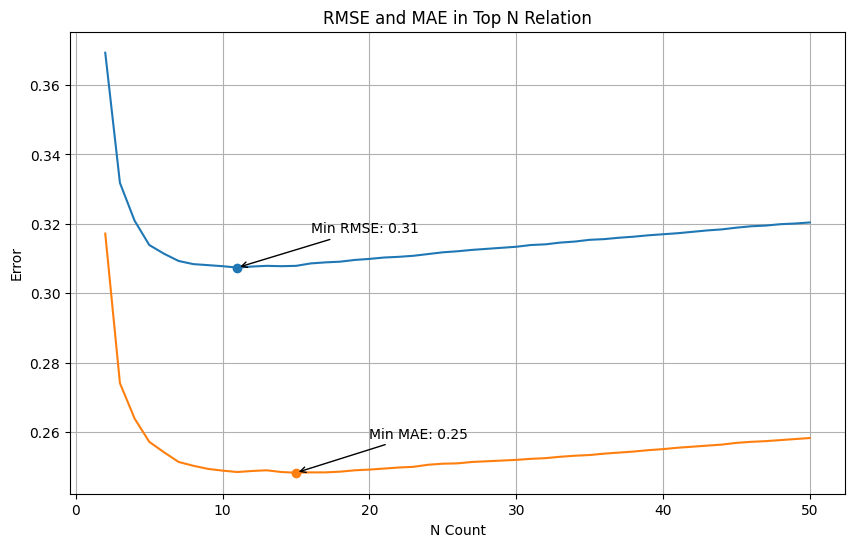

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(sample_arr1, rmse_item_cs, label='RMSE')
plt.plot(sample_arr1, mae_item_cs, label='MAE')
plt.scatter(sample_arr1[min_rmse_index], rmse_item_cs[min_rmse_index], marker='o', label='Min RMSE')
plt.scatter(sample_arr1[min_mae_index], mae_item_cs[min_mae_index], marker='o', label='Min MAE')

plt.annotate(f'Min RMSE: {rmse_item_cs[min_rmse_index]:.2f}',
             xy=(sample_arr1[min_rmse_index], rmse_item_cs[min_rmse_index]),
             xytext=(sample_arr1[min_rmse_index] + 5, rmse_item_cs[min_rmse_index] + 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate(f'Min MAE: {mae_item_cs[min_mae_index]:.2f}',
             xy=(sample_arr1[min_mae_index], mae_item_cs[min_mae_index]),
             xytext=(sample_arr1[min_mae_index] + 5, mae_item_cs[min_mae_index] + 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.xlabel('N Count')
plt.ylabel('Error')
plt.title('RMSE and MAE in Top N Relation')
plt.grid(True)
plt.show()

## ***PREDICT RATING***

In [ ]:
n = 9
df_pred_ib = df_transposed.copy()

# prediksi
for i in range(len(df_pred_ib)):
    # similarity
    for j in range(len(sim_item_cs)):
        # memeriksa apakah nilai sama dengan 0
        if (df_pred_ib[sim_item_cs.index[j]][i] == 0):

            numerator = 0
            denominator = 0

            tmp = top_n(n, sim_item_cs, sim_item_cs.index[j])
            for k in range(len(tmp)):
                if tmp.index[k] != sim_item_cs.index[j]:

                    numerator += ((item_based_df[tmp.index[k]][i]) * tmp.iloc[k])
                    denominator += tmp.iloc[k]

            if denominator != 0 :
                # update nilai prediksi
                df_pred_ib[sim_item_cs.index[j]][i] = average(df_transposed, sim_item_cs.index[j]) + (numerator/denominator)
df_pred_ib

nama film,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
moviemenfes,0.000000,-0.227595,0.278767,0.250000,-0.357595,0.180000,0.530000,-0.547595,0.100000,0.288061,...,-0.467595,-0.357595,-0.557595,-0.447595,0.350000,-0.287595,0.262470,-0.515591,0.400000,-0.607595
bicaraboxoffice,0.000000,0.188311,-0.527595,-0.078798,-0.347595,0.291396,0.160000,-0.495591,0.263486,-0.497595,...,-0.427595,-0.337595,-0.477595,0.159728,0.301875,0.209048,0.340718,0.340245,0.154543,0.278589
WatchmenID,0.000000,-0.167595,0.141797,0.249103,0.470000,0.273175,0.261711,0.340000,0.393459,0.259223,...,0.410000,0.490000,0.328122,0.359472,-0.365591,0.146834,0.326828,0.467364,-0.297595,0.240000
ErikDavis,0.000000,0.113443,0.250000,0.260000,-0.307595,0.280000,0.114840,-0.417595,0.310000,0.240000,...,0.155738,-0.287595,0.235132,0.220000,0.220000,-0.247595,0.320000,0.340000,0.200000,0.290000
arulfittron,-0.397595,0.340494,0.245783,0.377996,-0.297595,0.418507,-0.187595,0.262158,0.275902,-0.407595,...,0.129171,0.158748,0.207263,0.377916,0.490000,0.069224,0.476569,0.158306,0.194080,-0.517595
GilaFilmID,-0.327595,0.016993,0.390000,0.440000,0.520000,0.346933,0.288237,-0.377595,0.207996,0.460000,...,-0.357595,-0.267595,0.380000,0.430000,0.214972,0.025808,0.080000,0.095209,-0.215591,0.317996
TarizSolis,0.540000,-0.117595,0.490000,0.278158,0.530000,0.304973,0.158208,0.460000,-0.487595,0.530000,...,0.467996,0.560757,0.450000,0.307013,0.276983,0.221490,0.175992,0.425608,0.403407,0.360000
djaycoholyc,0.000000,0.730000,-0.227595,-0.307595,-0.257595,0.290000,0.211719,0.490000,0.400000,0.590000,...,0.389086,0.543988,0.500000,0.382670,-0.247595,0.061125,0.260000,0.433783,0.348830,0.400000
akstanwyck,0.000000,0.122951,0.250000,0.260000,0.557996,0.280000,0.202879,0.520000,0.310000,0.240000,...,0.379536,-0.227595,0.242407,0.220000,0.220000,0.580000,0.320000,0.380000,0.200000,0.290000
slashfilm,0.000000,0.267816,0.312144,0.260000,-0.227595,0.280000,0.223154,-0.247595,0.310000,0.240000,...,0.497996,0.573968,0.339587,0.220000,0.220000,0.610000,0.320000,-0.367595,0.155867,0.290000


***SAVING DATAFRAME***

In [ ]:
df_pred_ib.to_excel("ResultCF_IB.xlsx")

## ***EVALUATION***

In [ ]:
df_actualib = df_transposed.copy()
df_predib = pd.read_excel("ResultCF_IB.xlsx")
df_predib.rename(columns={'Unnamed: 0': 'nama film'}, inplace=True)

df_actual_values = df_actualib.to_numpy()
df_pred_values = df_predib.drop(columns='nama film').to_numpy()

y_actualib = df_actual_values.flatten()
y_predib = df_pred_values.flatten()

In [ ]:
MAE_ib = mean_absolute_error(y_actualib, y_predib)
MSE_ib = mean_squared_error(y_actualib, y_predib)
rmse_cbf_ib = math.sqrt(MSE_ib)

print("Mean Absolute Error (MAE):", MAE_ib)
print("Root Mean Square Error (RMSE):", rmse_cbf_ib)

Mean Absolute Error (MAE): 0.19486223299806688
Root Mean Square Error (RMSE): 0.24153998591638645


# **Content-Based Filtering**

In [ ]:
df_cbf = df_normalized.copy()
df_cbf

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.000000,0.000000,0.000000,0.000000,0.202405,0.202405,1.000000,0.000000,0.000000,...,0.000000,0.202405,0.0,0.000000,0.202405,0.000000,0.000000,0.000000,0.000000,0.0
1,3 Idiots,0.202405,0.000000,0.202405,0.000000,0.000000,0.000000,0.202405,1.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,5 Cowok Jagoan,0.000000,0.202405,0.000000,0.000000,0.000000,1.000000,1.000000,0.202405,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
3,6 Underground,1.000000,0.601202,0.000000,0.000000,0.997996,1.000000,0.000000,0.202405,0.000000,...,0.000000,0.202405,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
4,65,0.202405,0.202405,1.000000,0.202405,0.202405,1.000000,1.000000,0.202405,0.997996,...,1.000000,1.000000,1.0,0.995992,0.993988,0.202405,0.202405,0.000000,0.202405,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,You People,0.202405,0.000000,0.000000,0.202405,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,0.202405,0.000000,0.000000,0.202405,0.000000,0.000000,1.0
278,Young Adult,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.995992,1.000000,0.000000,...,0.000000,1.000000,0.0,0.000000,0.953908,0.000000,0.000000,0.000000,0.000000,0.0
279,Your Place or Mine,0.204409,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.202405,0.202405,0.000000,0.000000,0.0
280,Zodiac,1.000000,0.000000,0.202405,0.000000,0.000000,0.204409,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.202405,0.000000,0.0


## ***Set Columns***

In [ ]:
kolom = ['name', 'description', 'genre', 'keywords']
df_film_cbf = df_film[kolom].copy()

df_film_cbf

,name,description,genre,keywords
0,3 Days to Kill,A dying CIA agent trying to reconnect with his...,"['Action', 'Comedy', 'Drama']","spy,violence,dirty bomb,massacre,cough syrup"
1,3 Idiots,0,"['Comedy', 'Drama']","hairy chest,motivation,coming of age,against t..."
2,5 Cowok Jagoan,5 lifelong friends attempt to rescue a damsel ...,"['Action', 'Comedy']","rescue,fight,martial arts,gun,sword"
3,6 Underground,0,"['Action', 'Thriller']","yacht,the future,ensemble cast,italy,florence ..."
4,65,An astronaut crash lands on a mysterious plane...,"['Action', 'Adventure', 'Drama']","gun,shot in the eye,suicide contemplation,astr..."
...,...,...,...,...
277,You People,"Follows a new couple and their families, who f...","['Comedy', 'Romance']","racial tension,black american,couple,love,life"
278,Young Adult,0,"['Comedy', 'Drama']","emotional breakdown,mental illness,narcissism,..."
279,Your Place or Mine,Two long-distance best friends change each oth...,"['Comedy', 'Romance']","friend,best friend,volunteer,teenager,son"
280,Zodiac,0,"['Crime', 'Drama', 'Mystery']","zodiac killer,serial killer,mysterious murdere..."


In [ ]:
# mengganti nilai string '0'
df_film_cbf['description'] = df_film_cbf['description'].replace('0', '')

df_film_cbf['content'] = df_film_cbf['description'].astype(str) + ' ' + \
                         df_film_cbf['genre'].astype(str) + ' ' + \
                         df_film_cbf['keywords'].astype(str)

In [ ]:
df_film_cbf['content']

,content
0,A dying CIA agent trying to reconnect with his...
1,"['Comedy', 'Drama'] hairy chest,motivation,co..."
2,5 lifelong friends attempt to rescue a damsel ...
3,"['Action', 'Thriller'] yacht,the future,ensem..."
4,An astronaut crash lands on a mysterious plane...
...,...
277,"Follows a new couple and their families, who f..."
278,"['Comedy', 'Drama'] emotional breakdown,menta..."
279,Two long-distance best friends change each oth...
280,"['Crime', 'Drama', 'Mystery'] zodiac killer,s..."


# Word Embedding RoBERTa

In [ ]:
from transformers import RobertaTokenizer, RobertaModel
import torch

# tokenizer dan RoBERTa
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')

# word embedding dari teks
def get_embedding(text):
    tokens = tokenizer.encode(text, return_tensors='pt')

    # output embedding dari model
    with torch.no_grad():
        output = model(tokens)

    embedding = output.last_hidden_state.mean(dim=1)

    return embedding.numpy()

# terapkan fungsi pada kolom 'content'
df_film_cbf['embedding'] = df_film_cbf['content'].apply(get_embedding)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
df_film_cbf[['name', 'content', 'embedding']]

,name,content,embedding
0,3 Days to Kill,A dying CIA agent trying to reconnect with his...,"[[-0.045224972, 0.06570137, 0.07008492, 0.0442..."
1,3 Idiots,"['Comedy', 'Drama'] hairy chest,motivation,co...","[[0.00723928, 0.023784416, 0.05892408, 0.01317..."
2,5 Cowok Jagoan,5 lifelong friends attempt to rescue a damsel ...,"[[-0.048691466, 0.09946178, 0.07908643, 0.0587..."
3,6 Underground,"['Action', 'Thriller'] yacht,the future,ensem...","[[-0.015836023, 0.009272607, 0.09293624, 0.149..."
4,65,An astronaut crash lands on a mysterious plane...,"[[0.015206882, -0.0052494486, 0.04325614, 0.08..."
...,...,...,...
277,You People,"Follows a new couple and their families, who f...","[[0.009572815, 0.10583176, 0.072194144, 0.0194..."
278,Young Adult,"['Comedy', 'Drama'] emotional breakdown,menta...","[[-0.0042730253, 0.04471733, 0.055717863, 0.14..."
279,Your Place or Mine,Two long-distance best friends change each oth...,"[[0.03451758, 0.12987287, 0.0598381, 0.1322064..."
280,Zodiac,"['Crime', 'Drama', 'Mystery'] zodiac killer,s...","[[0.008716977, 0.03540421, 0.055931523, 0.2132..."


In [ ]:
def avg_embedding(embedding):
    return np.mean(embedding, axis=1)

# terapkan fungsi pada kolom 'embedding'
df_film_cbf['average_embedding'] = df_film_cbf['embedding'].apply(avg_embedding)

df_film_cbf[['name', 'average_embedding']]

,name,average_embedding
0,3 Days to Kill,[0.01926084]
1,3 Idiots,[0.01887867]
2,5 Cowok Jagoan,[0.019562624]
3,6 Underground,[0.018977357]
4,65,[0.018901816]
...,...,...
277,You People,[0.020177599]
278,Young Adult,[0.020126639]
279,Your Place or Mine,[0.019615544]
280,Zodiac,[0.020072734]


In [ ]:
embeddings = np.vstack(df_film_cbf['embedding'].to_numpy())

## ***Item Similarity***

In [ ]:
# cosine similarity
sim_matrix2 = cosine_similarity(embeddings)
sim_roberta = pd.DataFrame(sim_matrix2, index=df_cbf['nama film'].values, columns=df_cbf['nama film'].values)
sim_roberta

,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
3 Days to Kill,0.999999,0.975909,0.989264,0.969363,0.990247,0.989514,0.985815,0.987438,0.990751,0.988775,...,0.945436,0.987254,0.986133,0.990675,0.988048,0.983653,0.975718,0.988451,0.978084,0.980560
3 Idiots,0.975909,0.999999,0.978860,0.985145,0.980280,0.976133,0.978850,0.971416,0.980082,0.978368,...,0.966955,0.970919,0.984948,0.972008,0.977501,0.976431,0.988194,0.974688,0.980864,0.984533
5 Cowok Jagoan,0.989264,0.978860,1.000000,0.974002,0.987340,0.991072,0.983354,0.984335,0.988795,0.987671,...,0.954071,0.984010,0.988951,0.985946,0.988283,0.985025,0.978517,0.985958,0.977854,0.985691
6 Underground,0.969363,0.985145,0.974002,0.999999,0.977209,0.975006,0.973294,0.963576,0.973551,0.974206,...,0.973160,0.965881,0.977426,0.965079,0.970168,0.969766,0.978986,0.969424,0.976206,0.979970
65,0.990247,0.980280,0.987340,0.977209,1.000000,0.988192,0.983863,0.985097,0.989260,0.988859,...,0.953974,0.984833,0.987852,0.986455,0.986792,0.981066,0.978703,0.986333,0.982191,0.983939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You People,0.983653,0.976431,0.985025,0.969766,0.981066,0.983987,0.985457,0.980081,0.988419,0.984852,...,0.944348,0.985768,0.987365,0.984350,0.981275,1.000000,0.976583,0.982766,0.971586,0.979392
Young Adult,0.975718,0.988194,0.978517,0.978986,0.978703,0.974915,0.976054,0.968857,0.980746,0.975711,...,0.962847,0.972880,0.984599,0.971509,0.975032,0.976583,0.999999,0.974900,0.984561,0.985098
Your Place or Mine,0.988451,0.974688,0.985958,0.969424,0.986333,0.983880,0.985513,0.990111,0.989110,0.988769,...,0.944863,0.985680,0.985566,0.987238,0.986602,0.982766,0.974900,1.000000,0.971339,0.975840
Zodiac,0.978084,0.980864,0.977854,0.976206,0.982191,0.979350,0.973483,0.966905,0.979597,0.975885,...,0.959015,0.971397,0.981656,0.974504,0.975304,0.971586,0.984561,0.971339,1.000000,0.987018


### ***Top N Recommendations***

In [ ]:
nama_film = "Merantau"
recom = sim_roberta[nama_film].sort_values(ascending=False)[1:11] # Top 10
print(f"Rekomendasi untuk film '{nama_film}':")
print(recom)

Rekomendasi untuk film 'Merantau':
Uncut Gems            0.989466
Faraway               0.989105
Olympus Has Fallen    0.988438
Turning Red           0.988110
Zombieland            0.988105
Buffalo Boys          0.988014
The Ritual            0.987916
Velvet Buzzsaw        0.987570
The Interview         0.987386
Nightcrawler          0.986759
Name: Merantau, dtype: float32


## ***PREDICT RATING***

In [ ]:
target = df_cbf.copy()
target = target.T
target_pred = target.values

In [ ]:
df_result_roberta = target

roberta_cbf_result = df_cbf.values

# iterasi untuk setiap user
for idx_user in range(1, len(df_result_roberta)):
    # iterasi untuk setiap item
    for idx_item in range(0, len(df_cbf)):
        if roberta_cbf_result[idx_item][idx_user] == 0:
            print(f"Processing user {idx_user} & item {idx_item}")
            # menghitung prediksi rating
            item_sim = list(enumerate(sim_matrix2[idx_item]))
            item_rating = list(df_cbf[df_cbf.columns[idx_user]])
            item_sim = [(idx, score) for idx, score in item_sim if idx not in item_rating and score > 0 and idx != idx_item]

            pred_rating = 0
            count = 0

            # prediksi rating berdasarkan similarity
            for idx, score in item_sim:
                similar_item_rating = target_pred[idx_user][idx]
                pred_rating = pred_rating + similar_item_rating * score
                count = count + score

            if count == 0:
                roberta_cbf_result[idx_item][idx_user] = 0  # tidak ada item mirip
            else:
                # membagi prediksi dengan total similarity
                pred_rating = pred_rating / count
                roberta_cbf_result[idx_item][idx_user] = pred_rating

ResultCBF_ROBERTA = pd.DataFrame(roberta_cbf_result, columns=df_cbf.columns)

Streaming output truncated to the last 5000 lines.
Processing user 17 & item 226
Processing user 17 & item 227
Processing user 17 & item 228
Processing user 17 & item 229
Processing user 17 & item 230
Processing user 17 & item 231
Processing user 17 & item 232
Processing user 17 & item 233
Processing user 17 & item 234
Processing user 17 & item 235
Processing user 17 & item 236
Processing user 17 & item 237
Processing user 17 & item 238
Processing user 17 & item 239
Processing user 17 & item 240
Processing user 17 & item 241
Processing user 17 & item 242
Processing user 17 & item 243
Processing user 17 & item 244
Processing user 17 & item 245
Processing user 17 & item 246
Processing user 17 & item 247
Processing user 17 & item 248
Processing user 17 & item 249
Processing user 17 & item 250
Processing user 17 & item 251
Processing user 17 & item 252
Processing user 17 & item 253
Processing user 17 & item 254
Processing user 17 & item 255
Processing user 17 & item 256
Processing user 17 

In [ ]:
print(target.shape)
print(len(df_result_roberta))
print(len(df_cbf))

(40, 282)
40
282


## ***EVALUATION***

In [ ]:
df_actualroberta = df_cbf.copy()
df_predroberta = ResultCBF_ROBERTA.copy()

df_actual_values = df_actualroberta.drop(columns='nama film').to_numpy()
df_pred_values = df_predroberta.drop(columns='nama film').to_numpy()

y_actualroberta = df_actual_values.flatten()
y_predroberta = df_pred_values.flatten()

In [ ]:
MAE_roberta = mean_absolute_error(y_actualroberta, y_predroberta)
MSE_roberta = mean_squared_error(y_actualroberta, y_predroberta)
rmse_cbf_roberta = math.sqrt(MSE_roberta)

print("Mean Absolute Error (MAE):", MAE_roberta)
print("Root Mean Square Error (RMSE):", rmse_cbf_roberta)

Mean Absolute Error (MAE): 0.11639963179643995
Root Mean Square Error (RMSE): 0.16717242434729052


In [ ]:
ResultCBF_ROBERTA.to_excel("ResultCBF_ROBERTA.xlsx")
ResultCBF_ROBERTA

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.363267,0.218503,0.330096,0.082644,0.202405,0.202405,1.0,0.388543,0.141483,...,0.183703,0.202405,0.137944,0.110883,0.202405,0.207301,0.042444,0.114811,0.029954,0.00709
1,3 Idiots,0.202405,0.219515,0.202405,0.082961,0.328053,0.534325,0.202405,1.0,0.1421,...,0.184414,0.36408,0.138799,0.111471,0.156147,0.208046,0.042622,0.11513,0.029996,0.007151
2,5 Cowok Jagoan,0.364556,0.202405,0.33127,0.082928,0.327669,1.0,1.0,0.202405,0.142042,...,0.184366,0.363779,0.138605,0.111338,0.15611,1.0,0.042596,0.1151,0.030028,0.007138
3,6 Underground,1.0,0.601202,0.331204,0.082895,0.997996,1.0,0.481185,0.202405,0.142078,...,0.184443,0.202405,0.138891,0.111534,0.156076,1.0,0.042587,0.115041,0.029986,0.007161
4,65,0.202405,0.202405,1.0,0.202405,0.202405,1.0,1.0,0.202405,0.997996,...,1.0,1.0,1.0,0.995992,0.993988,0.202405,0.202405,0.115127,0.202405,0.007115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,You People,0.202405,0.219241,0.33127,0.202405,0.327634,0.534045,0.480772,0.390031,1.0,...,0.184394,0.363671,0.138517,0.202405,0.15622,0.208124,0.202405,0.115301,0.030115,1.0
278,Young Adult,0.364974,0.219499,0.33109,0.082957,0.327983,1.0,0.995992,1.0,0.142065,...,0.184383,1.0,0.138852,0.111444,0.953908,0.208139,0.042638,0.115231,0.030027,0.007208
279,Your Place or Mine,0.204409,0.219274,0.331251,1.0,0.32762,0.534097,0.480844,0.390015,1.0,...,0.184445,0.363548,0.138327,0.111302,0.156164,0.202405,0.202405,0.115264,0.030077,0.007129
280,Zodiac,1.0,0.219488,0.202405,0.08285,0.327875,0.204409,0.480943,0.389874,0.141987,...,0.184299,0.364094,0.138951,0.111403,0.156125,0.208066,0.042614,0.202405,0.029978,0.007165


#**Hybrid Filtering**

In [ ]:
from sklearn.metrics import ndcg_score

In [ ]:
pred_matrix_cf = df_pred_ib
pred_matrix_cbf_item_user = ResultCBF_ROBERTA

pred_matrix_cbf = pred_matrix_cbf_item_user.set_index('nama film').T
pred_matrix_cbf = pred_matrix_cbf.reindex(index=pred_matrix_cf.index, columns=pred_matrix_cf.columns)

actual_matrix = df_transposed

In [ ]:
alpha_values = np.arange(0, 1.1, 0.1)
hybrid_results = []

actual_flat = actual_matrix.to_numpy().flatten()
non_zero_indices = np.where(actual_flat != 0) # Indeks dari rating yang tidak nol
actual_non_zero = actual_flat[non_zero_indices]

for alpha in alpha_values:
    # Menggabungkan prediksi CF dan CBF
    hybrid_matrix = (alpha * pred_matrix_cbf) + ((1 - alpha) * pred_matrix_cf)
    pred_flat = hybrid_matrix.to_numpy().flatten()
    pred_non_zero = pred_flat[non_zero_indices]

    # Hitung MAE dan RMSE
    mae = mean_absolute_error(actual_non_zero, pred_non_zero)
    rmse = np.sqrt(mean_squared_error(actual_non_zero, pred_non_zero))

    hybrid_results.append({'alpha': f"{alpha:.1f}", 'MAE': mae, 'RMSE': rmse})

In [ ]:
df_alpha_results = pd.DataFrame(hybrid_results)
df_alpha_results['alpha_float'] = df_alpha_results['alpha'].astype(float)

filtered_results = df_alpha_results[df_alpha_results['alpha_float'] > 0]

if not filtered_results.empty:
    optimal_index = filtered_results['RMSE'].idxmin()

    optimal_alpha_row = filtered_results.loc[optimal_index]
    optimal_alpha = optimal_alpha_row['alpha_float']

    print("\nHasil Optimasi Bobot (α)")
    print(df_alpha_results[['alpha', 'MAE', 'RMSE']].to_string(index=False))
    print(f"\nBobot alpha (α) optimal ditemukan pada: {optimal_alpha:.1f}")


Hasil Optimasi Bobot (α)
alpha      MAE     RMSE
  0.0 0.000000 0.000000
  0.1 0.045208 0.048217
  0.2 0.090417 0.096433
  0.3 0.135625 0.144650
  0.4 0.180833 0.192866
  0.5 0.226042 0.241083
  0.6 0.271250 0.289299
  0.7 0.316458 0.337516
  0.8 0.361667 0.385732
  0.9 0.406875 0.433949
  1.0 0.452083 0.482165

Bobot alpha (α) optimal ditemukan pada: 0.1


In [ ]:
Result_Hybrid = (optimal_alpha * pred_matrix_cbf) + ((1 - optimal_alpha) * pred_matrix_cf)

mae_hybrid = optimal_alpha_row['MAE']
rmse_hybrid = optimal_alpha_row['RMSE']

print("\nEVALUASI PREDIKSI MODEL HYBRID")
print(f"(Menggunakan Alpha Optimal = {optimal_alpha:.1f})")
print(f"  MAE  : {mae_hybrid:.4f}")
print(f"  RMSE : {rmse_hybrid:.4f}")


EVALUASI PREDIKSI MODEL HYBRID
(Menggunakan Alpha Optimal = 0.1)
  MAE  : 0.0452
  RMSE : 0.0482


# **Cold Start Scenario**

In [ ]:
COLD_THRESHOLD = 20   # user dengan jumlah rating non-zero <= 20 dianggap cold
TOP_K = [5, 10]       # daftar K untuk metric (Precision@K, Recall@K, NDCG@K)
TOP_N_RECOMMEND = 10  # jumlah rekomendasi yang akan ditampilkan per user

In [ ]:
actual = actual_matrix.copy()        # ground truth ratings (0 untuk unrated)
pred = Result_Hybrid.copy()          # prediksi skor (model hybrid)

pred = pred.reindex(index=actual.index, columns=actual.columns)

In [ ]:
def get_cold_users(actual_df, threshold=COLD_THRESHOLD):
    non_zero_counts = (actual_df != 0).sum(axis=1)   # jumlah item yang sudah diberi rating per user
    cold_users = non_zero_counts[non_zero_counts <= threshold].index.to_list()
    return cold_users

In [ ]:
def evaluate_user_at_k(user_id, actual_df, pred_df, k):

    true_rels = (actual_df.loc[user_id].values > 0).astype(int)  # binary relevance array, shape=(n_items,)
    pred_scores = pred_df.loc[user_id].values.astype(float)

    n_relevant = int(true_rels.sum())
    if n_relevant == 0:
        return np.nan, np.nan, np.nan

    ranked_indices = np.argsort(-pred_scores)
    topk_idx = ranked_indices[:k]

    # Precision@K
    hits_at_k = true_rels[topk_idx].sum()
    precision_k = hits_at_k / k

    # Recall@K
    recall_k = hits_at_k / n_relevant

    # NDCG@K
    try:
        ndcg_k = ndcg_score([true_rels], [pred_scores], k=k)
    except Exception as e:
        ndcg_k = np.nan

    return precision_k, recall_k, ndcg_k

In [ ]:
def recommend_top_n_for_user(user_id, pred_df, actual_df, n=TOP_N_RECOMMEND):
    # jangan rekomendasikan item user sudah rated (actual > 0)
    user_pred = pred_df.loc[user_id].copy()
    already_rated_mask = (actual_df.loc[user_id] > 0)
    user_pred[already_rated_mask] = -np.inf   # set rendah supaya tidak dipilih

    topn = user_pred.sort_values(ascending=False).head(n)
    return topn

In [ ]:
cold_users = get_cold_users(actual, threshold=COLD_THRESHOLD)
print(f"Jumlah cold users (<= {COLD_THRESHOLD} ratings): {len(cold_users)}")
cold_users

Jumlah cold users (<= 20 ratings): 4


['kampusfilmID', 'eug', 'ngobrolinpilem', 'MintzPlasse']

In [ ]:
if len(cold_users) == 0:
    print("Tidak ada cold user sesuai threshold.")
else:
    # Store results
    per_user_metrics = {}

    for user in cold_users:
        per_user_metrics[user] = {}
        for k in TOP_K:
            p, r, nscore = evaluate_user_at_k(user, actual, pred, k)
            per_user_metrics[user][f'P@{k}'] = p
            per_user_metrics[user][f'R@{k}'] = r
            per_user_metrics[user][f'NDCG@{k}'] = nscore

    summary = {}
    for k in TOP_K:
        p_vals = [per_user_metrics[u][f'P@{k}'] for u in per_user_metrics if not np.isnan(per_user_metrics[u][f'P@{k}'])]
        r_vals = [per_user_metrics[u][f'R@{k}'] for u in per_user_metrics if not np.isnan(per_user_metrics[u][f'R@{k}'])]
        n_vals = [per_user_metrics[u][f'NDCG@{k}'] for u in per_user_metrics if not np.isnan(per_user_metrics[u][f'NDCG@{k}'])]
        summary[f'P@{k}_mean'] = np.mean(p_vals) if len(p_vals)>0 else np.nan
        summary[f'R@{k}_mean'] = np.mean(r_vals) if len(r_vals)>0 else np.nan
        summary[f'NDCG@{k}_mean'] = np.mean(n_vals) if len(n_vals)>0 else np.nan

    print("\nSummary (cold users)")
    for k in TOP_K:
        print(f"P@{k} mean  : {summary[f'P@{k}_mean']:.4f}" if not np.isnan(summary[f'P@{k}_mean']) else f"P@{k} mean  : NaN")
        print(f"R@{k} mean  : {summary[f'R@{k}_mean']:.4f}" if not np.isnan(summary[f'R@{k}_mean']) else f"R@{k} mean  : NaN")
        print(f"NDCG@{k} mean: {summary[f'NDCG@{k}_mean']:.4f}" if not np.isnan(summary[f'NDCG@{k}_mean']) else f"NDCG@{k} mean: NaN")
        print("")


Summary (cold users)
P@5 mean  : 0.8500
R@5 mean  : 0.6161
NDCG@5 mean: 1.0000

P@10 mean  : 0.7250
R@10 mean  : 0.8750
NDCG@10 mean: 1.0000



In [ ]:
print("Top-N rekomendasi untuk cold users")
example_users = cold_users[:10]
recommendations = {}

for user in example_users:
    topn_series = recommend_top_n_for_user(user, pred, actual, n=TOP_N_RECOMMEND)
    recommendations[user] = topn_series

    print(f"\nUser: {user}  (jumlah rated: {(actual.loc[user]>0).sum()})")
    print(topn_series.reset_index().rename(columns={'index':'movie', user:'pred_score'}).to_string(index=False))

Top-N rekomendasi untuk cold users

User: kampusfilmID  (jumlah rated: 12)
                nama film pred_score
                 Paradise   0.483599
       The Little Mermaid   0.426709
             Like & Share   0.381318
            The Two Popes   0.377593
               Extraction   0.363279
The Secret Life of Pets 2   0.361382
            Earth to Echo   0.360596
       My Octopus Teacher   0.348011
      Gita Cinta dari SMA   0.334644
                Long Shot   0.332067

User: eug  (jumlah rated: 15)
                            nama film pred_score
                            Freestyle    0.55252
          The Super Mario Bros. Movie   0.448765
                               Furies   0.425868
                              Maestro   0.412673
                            Pinocchio   0.387423
Indiana Jones and the Dial of Destiny   0.369943
                           Weathering   0.354266
                         May December   0.336569
                     We Can Be Heroes   0.3345

In [ ]:
metrics_rows = []

for user, mets in per_user_metrics.items():
    row = {'user': user}
    row.update(mets)
    metrics_rows.append(row)

df_cold_metrics = pd.DataFrame(metrics_rows).set_index('user')
df_cold_metrics

,P@5,R@5,NDCG@5,P@10,R@10,NDCG@10
user,,,,,,
kampusfilmID,1.0,0.416667,1.0,1.0,0.833333,1.0
eug,1.0,0.333333,1.0,1.0,0.666667,1.0
ngobrolinpilem,1.0,0.714286,1.0,0.7,1.000000,1.0
MintzPlasse,0.4,1.000000,1.0,0.2,1.000000,1.0


# ***Diversity & Novelty Evaluation***

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from itertools import combinations

def calculate_diversity(rec_list, feature_vectors):
    """Calculates the diversity score for a single recommendation list."""
    if len(rec_list) < 2:
        return 1.0

    # Get feature vectors only for the items in the recommendation list
    vectors_in_list = [feature_vectors[item_id] for item_id in rec_list if item_id in feature_vectors]

    if len(vectors_in_list) < 2:
        return 1.0

    pair_combinations = list(combinations(vectors_in_list, 2))

    similarity_scores = []
    for vec1, vec2 in pair_combinations:
        sim = cosine_similarity(vec1.reshape(1, -1), vec2.reshape(1, -1))[0][0]
        similarity_scores.append(sim)

    ils = np.mean(similarity_scores)
    diversity = 1 - ils
    return diversity

def calculate_novelty(rec_list, popularity_counts, total_reviews):
    """Calculates the novelty score for a single recommendation list."""
    if not rec_list:
        return 0.0

    self_information_scores = []
    for item_id in rec_list:
        popularity = popularity_counts.get(item_id, 1)
        info = -np.log2(popularity / total_reviews)
        self_information_scores.append(info)

    novelty = np.mean(self_information_scores)
    return novelty

In [ ]:
# Feature Vectors for Diversity (using RoBERTa embeddings)
# This creates a dictionary mapping: movie_name -> embedding_vector
feature_vectors = {name: emb.flatten() for name, emb in zip(df_film_cbf['name'], df_film_cbf['embedding'])}

# Popularity Counts for Novelty
# This creates a dictionary mapping: movie_name -> number_of_ratings
popularity_counts = df_rating['judul_film'].value_counts().to_dict()
total_reviews = len(df_rating)

print(f"Prepared feature vectors for {len(feature_vectors)} movies.")
print(f"Prepared popularity counts for {len(popularity_counts)} movies.")

Prepared feature vectors for 282 movies.
Prepared popularity counts for 613 movies.


In [ ]:
print("\n" + "="*50)
print("PERFORMANCE EVALUATION: DIVERSITY AND NOVELTY")
print("="*50 + "\n")

# Generate Recommendations from All Models
example_users = cold_users[:10] # Using the same users from the cold-start section

all_recs = {
    "Item-Based CF": {},
    "Content-Based": {},
    "Hybrid": {}
}

# Generate recs for each model
for user in example_users:
    # CF Recommendations (using df_pred_ib, which is your item-based prediction matrix)
    cf_recs = recommend_top_n_for_user(user, df_pred_ib, actual, n=TOP_N_RECOMMEND).index.tolist()
    all_recs["Item-Based CF"][user] = cf_recs

    # CBF Recommendations (using sim_roberta, item similarity matrix)
    user_ratings = df_transposed.loc[user]
    rated_movies = user_ratings[user_ratings > 0].index

    if not rated_movies.empty:
        # Simple CBF: aggregate similarities of rated movies
        cbf_scores = sim_roberta[rated_movies].mean(axis=1)
        cbf_scores[rated_movies] = -np.inf # Exclude already rated movies
        cbf_recs = cbf_scores.nlargest(TOP_N_RECOMMEND).index.tolist()
    else:
        cbf_recs = [] # Cannot recommend if user has no ratings
    all_recs["Content-Based"][user] = cbf_recs

    # Hybrid Recommendations (using Result_Hybrid, your hybrid prediction matrix)
    hybrid_recs = recommend_top_n_for_user(user, Result_Hybrid, actual, n=TOP_N_RECOMMEND).index.tolist()
    all_recs["Hybrid"][user] = hybrid_recs


PERFORMANCE EVALUATION: DIVERSITY AND NOVELTY



In [ ]:
# Calculate Metrics for Each Model
final_scores = {}

for model_name, user_recs in all_recs.items():
    model_diversity_scores = []
    model_novelty_scores = []

    for user, rec_list in user_recs.items():
        if rec_list: # Only calculate if a recommendation list exists
            diversity = calculate_diversity(rec_list, feature_vectors)
            novelty = calculate_novelty(rec_list, popularity_counts, total_reviews)
            model_diversity_scores.append(diversity)
            model_novelty_scores.append(novelty)

    avg_diversity = np.mean(model_diversity_scores) if model_diversity_scores else np.nan
    avg_novelty = np.mean(model_novelty_scores) if model_novelty_scores else np.nan

    final_scores[model_name] = {
        'Diversity': avg_diversity,
        'Novelty': avg_novelty
    }

In [ ]:
# Combine with your previous accuracy results
final_results_data = {
    "MAE": {
        "Item-Based CF": MAE_ib,
        "Content-Based": MAE_roberta,
        "Hybrid": mae_hybrid
    },
    "RMSE": {
        "Item-Based CF": rmse_cbf_ib,
        "Content-Based": rmse_cbf_roberta,
        "Hybrid": rmse_hybrid
    },
    "Diversity": {
        "Item-Based CF": final_scores["Item-Based CF"]["Diversity"],
        "Content-Based": final_scores["Content-Based"]["Diversity"],
        "Hybrid": final_scores["Hybrid"]["Diversity"]
    },
    "Novelty": {
        "Item-Based CF": final_scores["Item-Based CF"]["Novelty"],
        "Content-Based": final_scores["Content-Based"]["Novelty"],
        "Hybrid": final_scores["Hybrid"]["Novelty"]
    }
}

final_df = pd.DataFrame(final_results_data)
print("Final Model Comparison:")
print(final_df.round(4))

Final Model Comparison:
                  MAE    RMSE  Diversity  Novelty
Item-Based CF  0.1949  0.2415     0.0210  10.1030
Content-Based  0.1164  0.1672     0.0114  10.9171
Hybrid         0.0452  0.0482     0.0213  10.1086


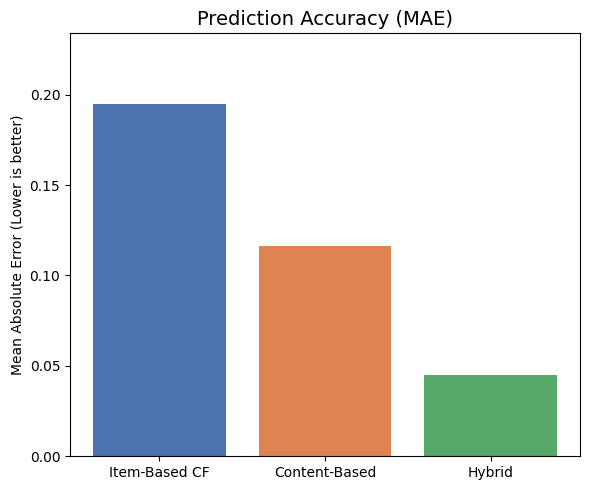

In [ ]:
data = {
    'MAE': {'Item-Based CF': 0.1949, 'Content-Based': 0.1164, 'Hybrid': 0.0452}
}
results_df = pd.DataFrame(data)
models = results_df.index
colors = ['#4c72b0', '#dd8452', '#55a868']

# --- Create the Plot ---
plt.figure(figsize=(6, 5))
plt.bar(models, results_df['MAE'], color=colors)
plt.title('Prediction Accuracy (MAE)', fontsize=14)
plt.ylabel('Mean Absolute Error (Lower is better)')
plt.ylim(0, max(results_df['MAE']) * 1.2)
plt.tight_layout()

# --- Save and Show ---
plt.savefig('mae_comparison.png', dpi=300)
plt.show()

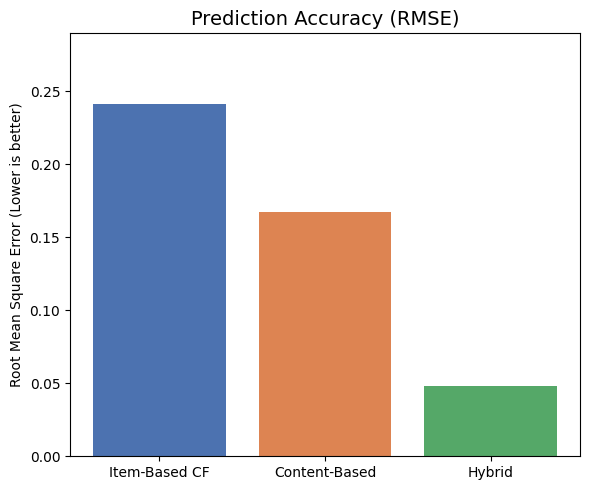

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Data Setup ---
data = {
    'RMSE': {'Item-Based CF': 0.2415, 'Content-Based': 0.1672, 'Hybrid': 0.0482}
}
results_df = pd.DataFrame(data)
models = results_df.index
colors = ['#4c72b0', '#dd8452', '#55a868']

# --- Create the Plot ---
plt.figure(figsize=(6, 5))
plt.bar(models, results_df['RMSE'], color=colors)
plt.title('Prediction Accuracy (RMSE)', fontsize=14)
plt.ylabel('Root Mean Square Error (Lower is better)')
plt.ylim(0, max(results_df['RMSE']) * 1.2)
plt.tight_layout()

# --- Save and Show ---
plt.savefig('rmse_comparison.png', dpi=300)
plt.show()